In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [79]:
Data=pd.read_excel("/content/cervical_cancer_DS.xlsx", na_values=['?'])


In [80]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

In [81]:
print(Data.head(5))

   Age  Number of sexual partners  First sexual intercourse  \
0   18                        4.0                      15.0   
1   15                        1.0                      14.0   
2   34                        1.0                       NaN   
3   52                        5.0                      16.0   
4   46                        3.0                      21.0   

   Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
0                 1.0     0.0             0.0                  0.0   
1                 1.0     0.0             0.0                  0.0   
2                 1.0     0.0             0.0                  0.0   
3                 4.0     1.0            37.0                 37.0   
4                 4.0     0.0             0.0                  0.0   

   Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  ...  \
0                      0.0                              0.0  0.0  ...   
1                      0.0                            

In [82]:
Data.isnull().sum()

,0
Age,0
Number of sexual partners,26
First sexual intercourse,7
Num of pregnancies,56
Smokes,13
Smokes (years),13
Smokes (packs/year),13
Hormonal Contraceptives,108
Hormonal Contraceptives (years),108
IUD,117


In [83]:
missing_percent = Data.isnull().mean() * 100
print("\nPercentage of missing values per column:")
print(missing_percent)


Percentage of missing values per column:
Age                                    0.000000
Number of sexual partners              3.030303
First sexual intercourse               0.815851
Num of pregnancies                     6.526807
Smokes                                 1.515152
Smokes (years)                         1.515152
Smokes (packs/year)                    1.515152
Hormonal Contraceptives               12.587413
Hormonal Contraceptives (years)       12.587413
IUD                                   13.636364
IUD (years)                           13.636364
STDs                                  12.237762
STDs (number)                         12.237762
STDs:condylomatosis                   12.237762
STDs:cervical condylomatosis          12.237762
STDs:vaginal condylomatosis           12.237762
STDs:vulvo-perineal condylomatosis    12.237762
STDs:syphilis                         12.237762
STDs:pelvic inflammatory disease      12.237762
STDs:genital herpes                   12.23776

In [84]:
Data.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,832.000000,851.000000,802.000000,845.000000,845.000000,845.000000,750.000000,750.000000,741.000000,...,71.000000,71.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.145562,1.219721,0.453144,0.641333,2.256419,0.112011,...,6.140845,5.816901,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.667760,2.803355,1.447414,0.352876,4.089017,2.226610,0.479929,3.764254,0.315593,...,5.895024,5.755271,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,8.000000,7.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


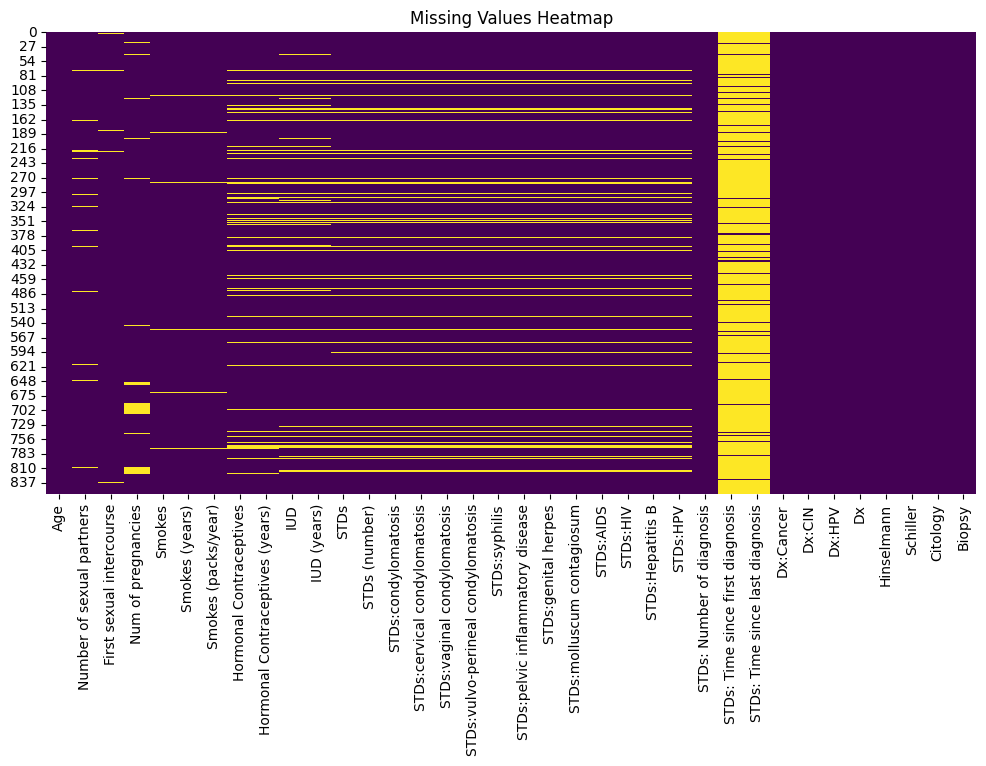

In [85]:
plt.figure(figsize=(12,6))
sns.heatmap(Data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

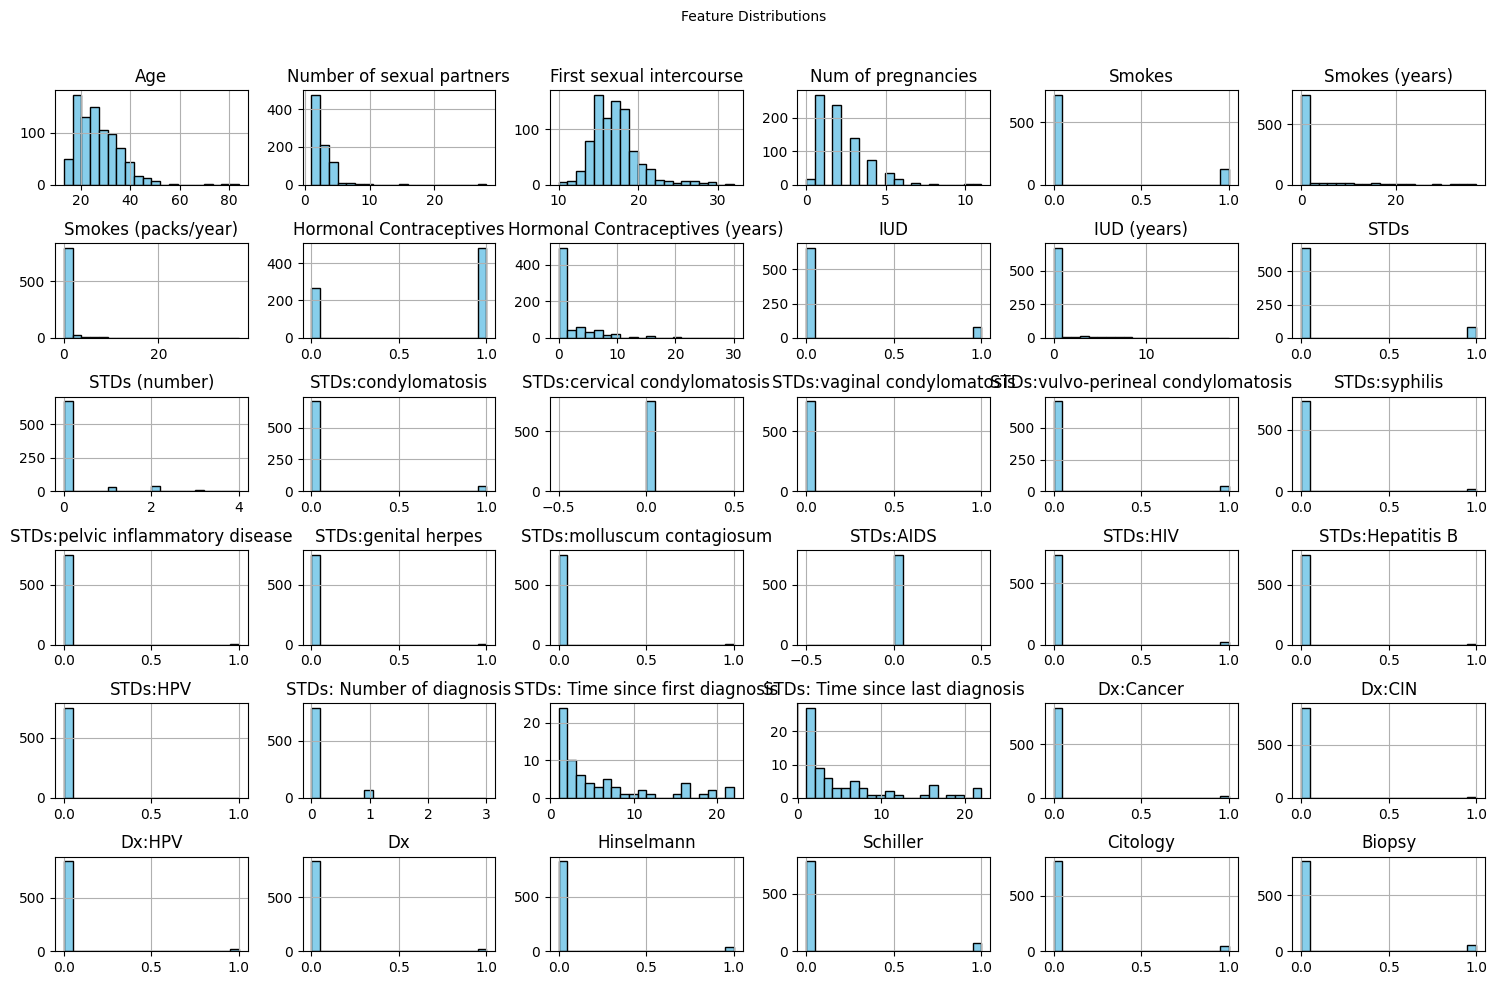

In [86]:
Data.hist(figsize=(15,10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=10)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [87]:
numeric_cols = Data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = Data.select_dtypes(include=['object']).columns

print("Numeric columns:", list(numeric_cols))
print("Categorical columns:", list(categorical_cols))

Numeric columns: ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy']
Categorical columns: []


In [88]:
Mode_Age= Data['Age'].mode()[0]
print(Mode_Age)
Data['Age'].fillna(Mode_Age, inplace=True)

23


/tmp/ipython-input-2822342327.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Data['Age'].fillna(Mode_Age, inplace=True)


In [89]:
Mode_Sex_partners= Data['Number of sexual partners'].mode()[0]
print(Mode_Sex_partners)
Data['Number of sexual partners'].fillna(Mode_Sex_partners, inplace=True)

2.0


/tmp/ipython-input-3320171605.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Data['Number of sexual partners'].fillna(Mode_Sex_partners, inplace=True)


In [90]:
Data['First sexual intercourse'].fillna(Data['First sexual intercourse'].mean(), inplace=True)

/tmp/ipython-input-1590169849.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Data['First sexual intercourse'].fillna(Data['First sexual intercourse'].mean(), inplace=True)


In [91]:
Data[numeric_cols[3]] = Data[numeric_cols[3]].fillna(2)

In [92]:
Data[numeric_cols[4]] = Data[numeric_cols[4]].fillna(0)

In [93]:
Data['Smokes (years)'].fillna(Data['Smokes (years)'].mean(), inplace=True)

/tmp/ipython-input-319972032.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Data['Smokes (years)'].fillna(Data['Smokes (years)'].mean(), inplace=True)


In [94]:
Data['Smokes (packs/year)'].fillna(Data['Smokes (packs/year)'].mean(), inplace=True)

/tmp/ipython-input-2076596316.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Data['Smokes (packs/year)'].fillna(Data['Smokes (packs/year)'].mean(), inplace=True)


In [95]:
Data[numeric_cols[7]] = Data[numeric_cols[7]].fillna(1)

In [96]:
Data['Hormonal Contraceptives (years)'].fillna(Data['Hormonal Contraceptives (years)'].mean(), inplace=True)

/tmp/ipython-input-541581330.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Data['Hormonal Contraceptives (years)'].fillna(Data['Hormonal Contraceptives (years)'].mean(), inplace=True)


In [97]:
Data[numeric_cols[9]] = Data[numeric_cols[9]].fillna(0)

In [98]:
Data[numeric_cols[10:26]] = Data[numeric_cols[10:26]].fillna(0)

In [99]:
Data['STDs: Time since first diagnosis']=Data['STDs: Time since first diagnosis'].fillna(-1)

In [100]:
Data['STDs: Time since last diagnosis']=Data['STDs: Time since last diagnosis'].fillna(-1)

In [101]:
Data.isnull().sum()

,0
Age,0
Number of sexual partners,0
First sexual intercourse,0
Num of pregnancies,0
Smokes,0
Smokes (years),0
Smokes (packs/year),0
Hormonal Contraceptives,0
Hormonal Contraceptives (years),0
IUD,0


In [102]:
# spplittting target value
X = Data.drop('Biopsy', axis=1)
y = Data['Biopsy']

In [103]:
#converting into train 70% and test 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [104]:
#Scaling Numerical Values
#it will be used for some models -- SVM, KNN, Logistic Regression
#Bcz These values are sensitive to the range of feature values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled= scaler.transform(X_test)

In [105]:
#Linear Model
LG_Model= LogisticRegression(
    C=1.0,
    penalty="l2",
    solver="liblinear",
    max_iter=1000)
LG_Model.fit(X_train, y_train)
y_pred = LG_Model.predict(X_test)
print("Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Results
Accuracy: 0.9612403100775194
Confusion Matrix:
 [[239   4]
 [  6   9]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       243
           1       0.69      0.60      0.64        15

    accuracy                           0.96       258
   macro avg       0.83      0.79      0.81       258
weighted avg       0.96      0.96      0.96       258



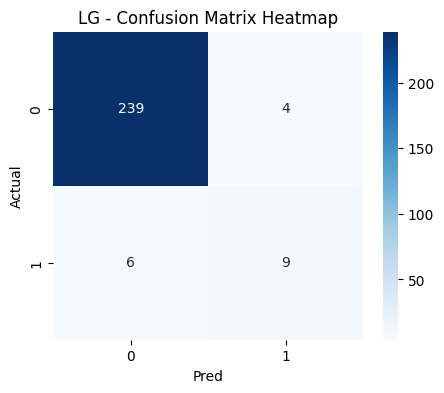

In [106]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("LG - Confusion Matrix Heatmap")
plt.xlabel("Pred")
plt.ylabel("Actual")
plt.show()

Best Hyperparameters:  {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score:  0.9616666666666667
Test Accuracy:  0.9612403100775194
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       243
           1       0.62      0.87      0.72        15

    accuracy                           0.96       258
   macro avg       0.81      0.92      0.85       258
weighted avg       0.97      0.96      0.96       258



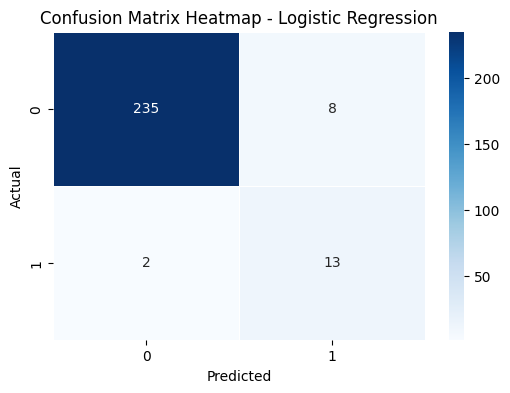

In [107]:
LG_Model= LogisticRegression(max_iter=5000)
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

grid = GridSearchCV(estimator=LG_Model, param_grid=param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)
print("Best Hyperparameters: ", grid.best_params_)
print("Best Score: ", grid.best_score_)
best_log_reg = grid.best_estimator_
y_pred = best_log_reg.predict(X_test_scaled)
print("Test Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.title("Confusion Matrix Heatmap - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

 Model Results
Accuracy:
 0.9573643410852714
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       243
           1       0.70      0.47      0.56        15

    accuracy                           0.96       258
   macro avg       0.83      0.73      0.77       258
weighted avg       0.95      0.96      0.95       258



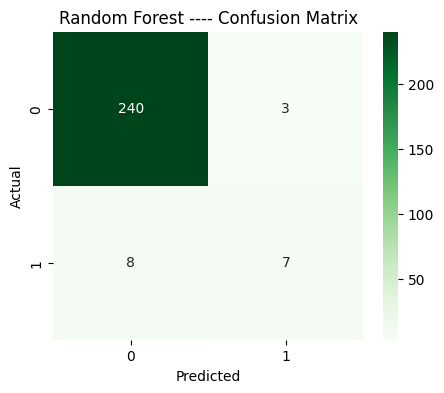

In [108]:
#Tree Based Model
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    min_samples_split=5
    )
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print(" Model Results")
print("Accuracy:\n", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest ---- Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

 SVM Results
Accuracy:
 0.9418604651162791
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       243
           1       0.00      0.00      0.00        15

    accuracy                           0.94       258
   macro avg       0.47      0.50      0.49       258
weighted avg       0.89      0.94      0.91       258



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


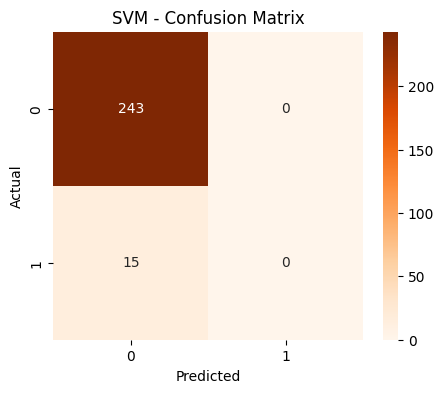

In [109]:
#Keral Based Model
#svm uses svc for classification and svr for regression
svm_model = SVC(
    kernel='rbf',
    random_state=42,
    gamma="scale"
    )
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(" SVM Results")
print("Accuracy:\n", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Oranges')
plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

K-Nearest Neighbors Results
Accuracy: 0.937984496124031

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       243
           1       0.00      0.00      0.00        15

    accuracy                           0.94       258
   macro avg       0.47      0.50      0.48       258
weighted avg       0.89      0.94      0.91       258



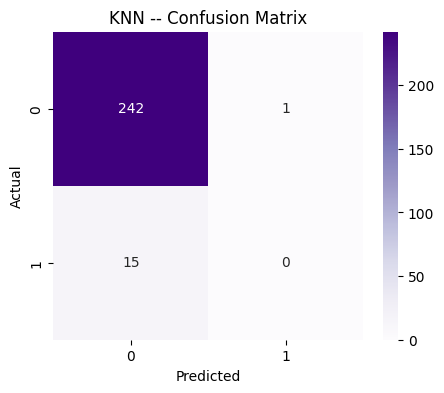

In [110]:
#Distance Based Model
knn_model = KNeighborsClassifier(
    n_neighbors=5,
    weights="distance",
    metric="euclidean"
    )

knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

print("K-Nearest Neighbors Results")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Purples')
plt.title("KNN -- Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

XGBoost Results 
Accuracy: 0.9457364341085271

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       243
           1       0.54      0.47      0.50        15

    accuracy                           0.95       258
   macro avg       0.75      0.72      0.74       258
weighted avg       0.94      0.95      0.94       258



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:11:31] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


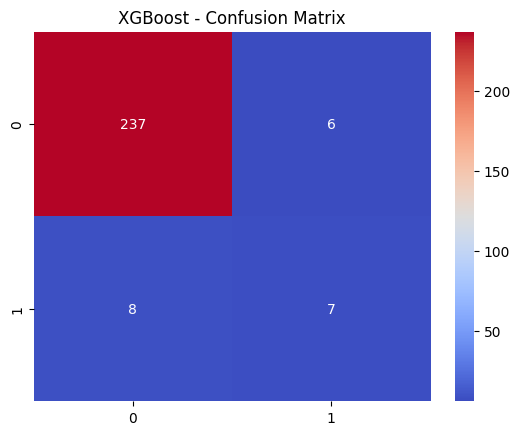

In [111]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42)

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print("XGBoost Results ")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm')
plt.title("XGBoost - Confusion Matrix")
plt.show()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Neural Network Results
Accuracy: 0.9534883499145508
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


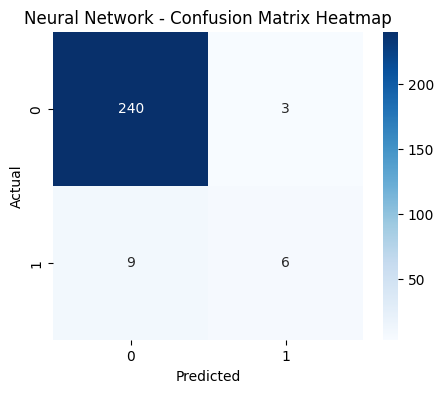

In [112]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


# Model Building
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy']
    )

#Model Training
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=0)

# Evaluating
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print("Neural Network Results")
print("Accuracy:", acc)

# Predictions (for confusion matrix)
y_pred = (model.predict(X_test) > 0.5).astype("int32")

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Neural Network - Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

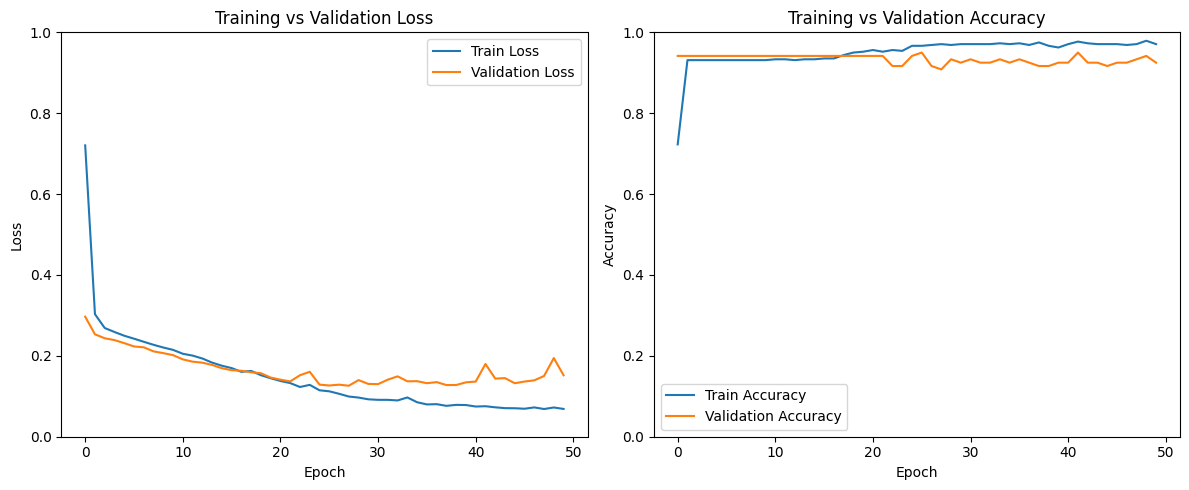

In [113]:
plt.figure(figsize=(12,5))

# Loss Curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.ylim(0, 1)
plt.legend()
#Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.legend()

plt.tight_layout()
plt.show()

In [114]:
Data1=Data

In [115]:
Data1.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,0,0,0,0,0,0,0,0
1,15,1.0,14.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,0,0,0,0,0,0,0,0
2,34,1.0,16.9953,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,0,0,0,0,0,0,0,0
3,52,5.0,16.0000,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,-1.0,-1.0,1,0,1,0,0,0,0,0
4,46,3.0,21.0000,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,-1.0,-1.0,0,0,0,0,0,0,0,0


In [116]:
Data1 = Data1.drop(['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], axis=1)

In [117]:
Data1.isnull().sum()

,0
Age,0
Number of sexual partners,0
First sexual intercourse,0
Num of pregnancies,0
Smokes,0
Smokes (years),0
Smokes (packs/year),0
Hormonal Contraceptives,0
Hormonal Contraceptives (years),0
IUD,0


In [118]:
X1 = Data1.drop('Biopsy', axis=1)
y1 = Data1['Biopsy']

In [119]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [120]:
scaler = StandardScaler()
X_train_scaler1 = scaler.fit_transform(X_train1)

X_test_scaler1 = scaler.transform(X_test1)

 Model Results
Accuracy:
 0.9612403100775194
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       243
           1       0.73      0.53      0.62        15

    accuracy                           0.96       258
   macro avg       0.85      0.76      0.80       258
weighted avg       0.96      0.96      0.96       258



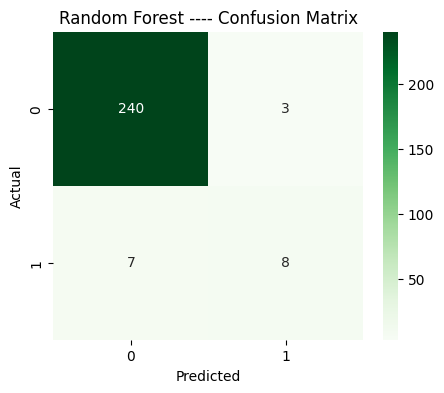

In [121]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    min_samples_split=5)
rf_model.fit(X_train1, y_train1)
y_pred = rf_model.predict(X_test1)

print(" Model Results")
print("Accuracy:\n", accuracy_score(y_test1, y_pred))
print("Classification Report:\n", classification_report(y_test1, y_pred))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test1, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest ---- Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

 SVM Results
Accuracy:
 0.9418604651162791
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       243
           1       0.00      0.00      0.00        15

    accuracy                           0.94       258
   macro avg       0.47      0.50      0.49       258
weighted avg       0.89      0.94      0.91       258



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


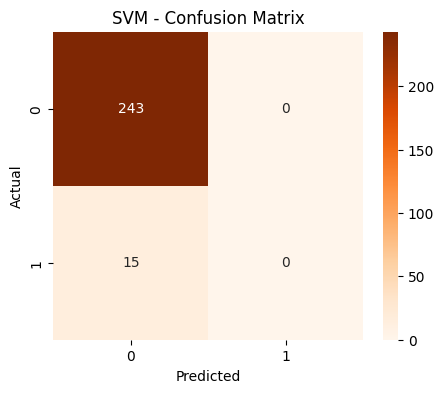

In [122]:
svm_model = SVC(
    kernel='rbf',
    random_state=42,
    gamma="scale"
    )
svm_model.fit(X_train1, y_train1)
y_pred = svm_model.predict(X_test1)

print(" SVM Results")
print("Accuracy:\n", accuracy_score(y_test1, y_pred))
print("Classification Report:\n", classification_report(y_test1, y_pred))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test1, y_pred), annot=True, fmt='d', cmap='Oranges')
plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

K-Nearest Neighbors Results
Accuracy: 0.937984496124031

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       243
           1       0.00      0.00      0.00        15

    accuracy                           0.94       258
   macro avg       0.47      0.50      0.48       258
weighted avg       0.89      0.94      0.91       258



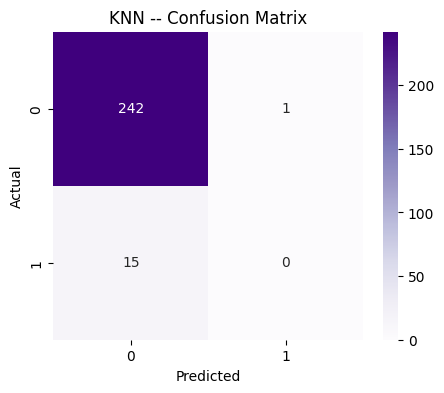

In [123]:
knn_model = KNeighborsClassifier(
    n_neighbors=5,
    weights="distance",
    metric="euclidean"
    )
knn_model.fit(X_train1, y_train1)
y_pred = knn_model.predict(X_test1)

print("K-Nearest Neighbors Results")
print("Accuracy:", accuracy_score(y_test1, y_pred))
print("\nClassification Report:\n", classification_report(y_test1, y_pred))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test1, y_pred), annot=True, fmt='d', cmap='Purples')
plt.title("KNN -- Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:11:42] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


 XGBoost Results 
Accuracy: 0.9457364341085271

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       243
           1       0.54      0.47      0.50        15

    accuracy                           0.95       258
   macro avg       0.75      0.72      0.74       258
weighted avg       0.94      0.95      0.94       258



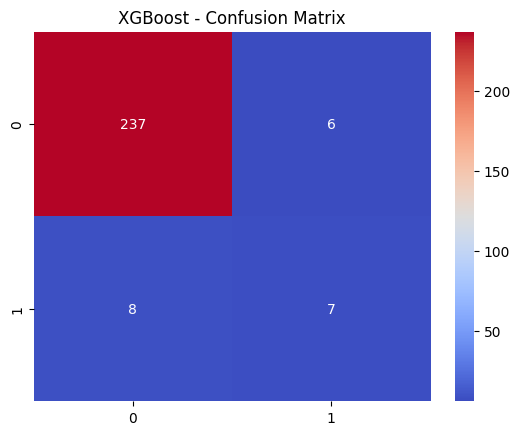

In [124]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42)
xgb.fit(X_train1, y_train1)
y_pred = xgb.predict(X_test1)

print(" XGBoost Results ")
print("Accuracy:", accuracy_score(y_test1, y_pred))
print("\nClassification Report:\n", classification_report(y_test1, y_pred))

sns.heatmap(confusion_matrix(y_test1, y_pred), annot=True, fmt='d', cmap='coolwarm')
plt.title("XGBoost - Confusion Matrix")
plt.show()

Logistic Regression Results
Accuracy: 0.9573643410852714
Confusion Matrix:
 [[239   4]
 [  7   8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       243
           1       0.67      0.53      0.59        15

    accuracy                           0.96       258
   macro avg       0.82      0.76      0.79       258
weighted avg       0.95      0.96      0.96       258



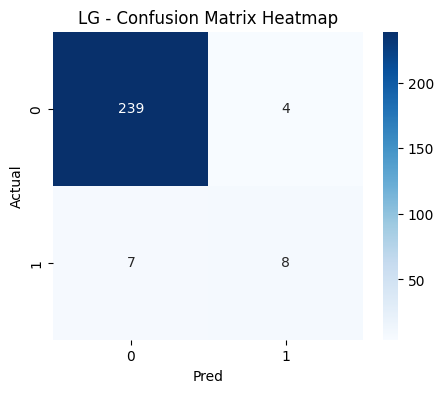

In [125]:
LG_Model= LogisticRegression(max_iter=2000)
LG_Model.fit(X_train1, y_train1)
y_pred = LG_Model.predict(X_test1)
print("Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test1, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test1, y_pred))
print("Classification Report:\n", classification_report(y_test1, y_pred))
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test1, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("LG - Confusion Matrix Heatmap")
plt.xlabel("Pred")
plt.ylabel("Actual")
plt.show()

Best Hyperparameters:  {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score:  0.9616666666666667
Test Accuracy:  0.9612403100775194
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       243
           1       0.62      0.87      0.72        15

    accuracy                           0.96       258
   macro avg       0.81      0.92      0.85       258
weighted avg       0.97      0.96      0.96       258



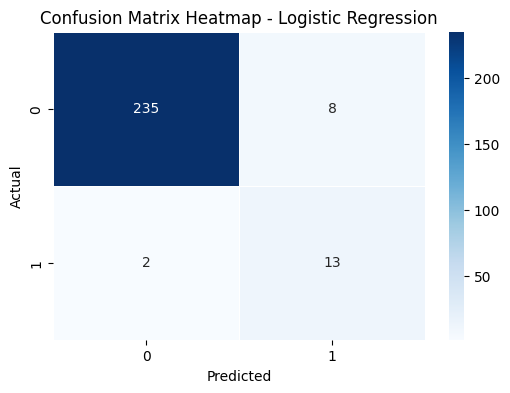

In [126]:
LG_Model= LogisticRegression(max_iter=5000)
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

grid = GridSearchCV(estimator=LG_Model, param_grid=param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaler1, y_train1)
print("Best Hyperparameters: ", grid.best_params_)
print("Best Score: ", grid.best_score_)
best_log_reg = grid.best_estimator_
y_pred = best_log_reg.predict(X_test_scaler1)
print("Test Accuracy: ", accuracy_score(y_test1, y_pred))
print(classification_report(y_test1, y_pred))

cm = confusion_matrix(y_test1, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.title("Confusion Matrix Heatmap - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [127]:
y_pred = best_log_reg.predict(X_test_scaler1)

print("Predictions:", y_pred[:30])
print("Actual:", y_test.values[:30])

Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Actual: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


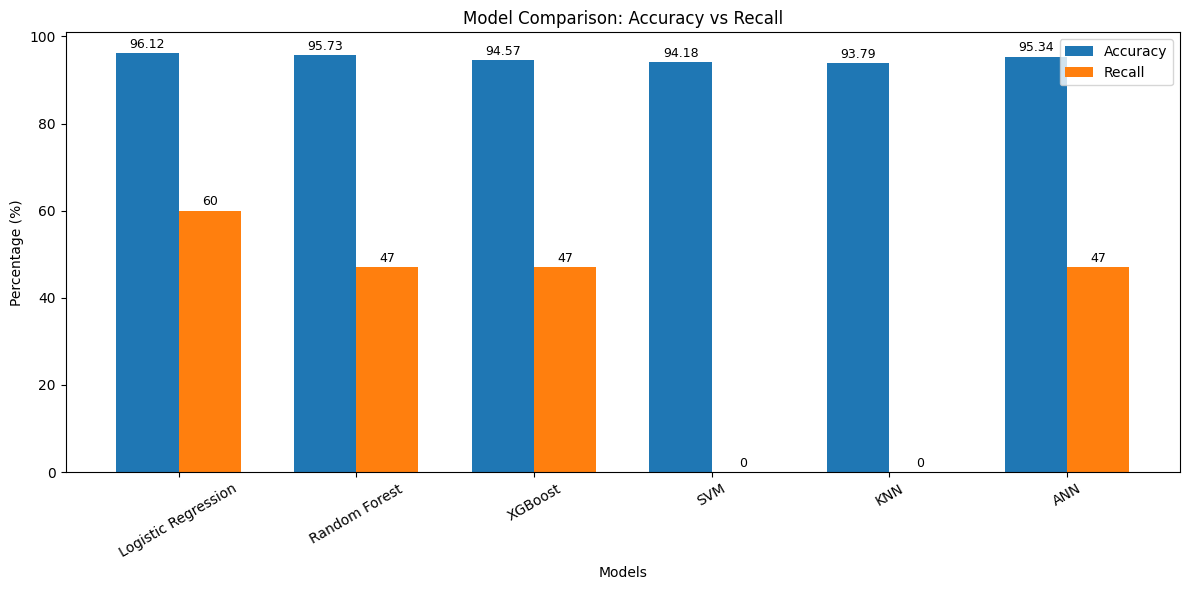

In [128]:
models = [
    "Logistic Regression",
    "Random Forest",
    "XGBoost",
    "SVM",
    "KNN",
    "ANN"
]

# Values from your table
accuracy = [96.12, 95.73, 94.57, 94.18, 93.79, 95.34]
recall = [60, 47, 47, 0, 0, 47]

x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(12, 6))

bars1 = plt.bar(x - width/2, accuracy, width, label="Accuracy")
bars2 = plt.bar(x + width/2, recall, width, label="Recall")

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.5,
        f"{height:.2f}",
        ha="center",
        va="bottom",
        fontsize=9
    )

for bar in bars2:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.5,
        f"{height:.0f}",
        ha="center",
        va="bottom",
        fontsize=9
    )

# Labels and title
plt.xlabel("Models")
plt.ylabel("Percentage (%)")
plt.title("Model Comparison: Accuracy vs Recall")
plt.xticks(x, models, rotation=30)
plt.legend()

plt.tight_layout()
plt.show()

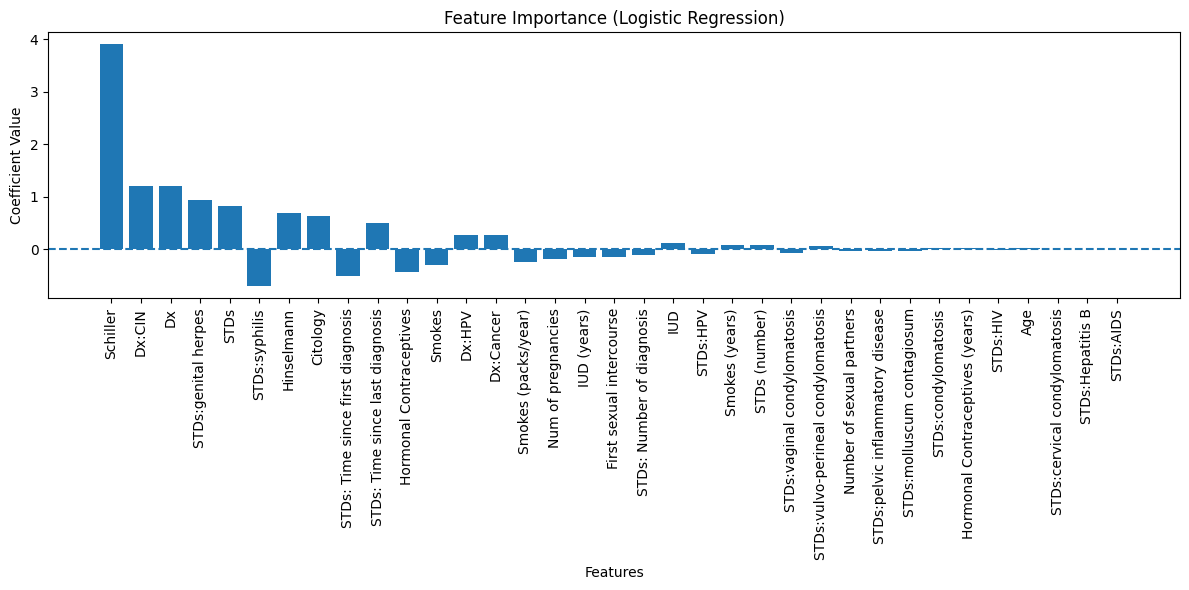

In [129]:
log_reg = LogisticRegression(
    C=1.0,
    penalty="l2",
    solver="liblinear",
    max_iter=500
)

log_reg.fit(X_train, y_train)
coefficients = log_reg.coef_[0]

# Feature names
feature_names = X.columns

coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
})

coef_df["Abs_Coefficient"] = coef_df["Coefficient"].abs()
coef_df = coef_df.sort_values(by="Abs_Coefficient", ascending=False)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(coef_df["Feature"], coef_df["Coefficient"])
plt.axhline(0, linestyle="--")
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Feature Importance (Logistic Regression)")
plt.tight_layout()
plt.show()

In [149]:
new_patient_df = pd.DataFrame(
    np.zeros((1, len(scaler.feature_names_in_))),
    columns=scaler.feature_names_in_
)

# some known values
new_patient_df.loc[0, "Age"] = 23
new_patient_df.loc[0, "Number of sexual partners"] = 3
new_patient_df.loc[0, "First sexual intercourse"] = 18
new_patient_df.loc[0, "Num of pregnancies"] = 3
new_patient_df.loc[0, "Smokes"] = 1
new_patient_df.loc[0, "Smokes (years)"] = 0
new_patient_df.loc[0, "Smokes (packs/year)"] = 0
new_patient_df.loc[0, "Hormonal Contraceptives"] = 1
new_patient_df.loc[0, "Hormonal Contraceptives (years)"] = 5
new_patient_df.loc[0, "IUD"] = 1
new_patient_df.loc[0, "IUD (years)"] = 5
new_patient_df.loc[0, "STDs"] = 1
new_patient_df.loc[0, "STDs (number)"] = 4
new_patient_df.loc[0, "STDs:condylomatosis"] = 0
new_patient_df.loc[0, "STDs:cervical condylomatosis"] = 1
new_patient_df.loc[0, "STDs:vaginal condylomatosis"] = 1
new_patient_df.loc[0, "STDs:vulvo-perineal condylomatosis"] = 1
new_patient_df.loc[0, "STDs:syphilis"] = 0
new_patient_df.loc[0, "STDs:pelvic inflammatory disease"] = 1
new_patient_df.loc[0, "STDs:genital herpes"] = 1
new_patient_df.loc[0, "STDs:molluscum contagiosum"] = 1
new_patient_df.loc[0, "STDs:AIDS"] = 1
new_patient_df.loc[0, "STDs:HIV"] = 0
new_patient_df.loc[0, "STDs:Hepatitis B"] = 1
new_patient_df.loc[0, "STDs:HPV"] = 1
new_patient_df.loc[0, "STDs: Number of diagnosis"] = 5
new_patient_df.loc[0, "Dx:Cancer"] = 1
new_patient_df.loc[0, "Dx:CIN"] = 1
new_patient_df.loc[0, "Dx:HPV"] = 1
new_patient_df.loc[0, "Dx"] = 1
new_patient_df.loc[0, "Hinselmann"] = 1
new_patient_df.loc[0, "Schiller"] = 0
new_patient_df.loc[0, "Citology"] = 1

# All other features remain 0


In [150]:
new_patient_scaled = scaler.transform(new_patient_df)

In [151]:
prediction = best_log_reg.predict(new_patient_scaled)
probability = best_log_reg.predict_proba(new_patient_scaled)


In [152]:
print("Prediction:", "Cancer Detected" if prediction[0] == 1 else "No Cancer Detected")
print("Cancer Probability:", round(probability[0][1] * 100, 2), "%")


Prediction: Cancer Detected
Cancer Probability: 92.54 %


In [153]:
#This explains why the model predicted this result.
coeffs = best_log_reg.coef_[0]
contributions = new_patient_scaled[0] * coeffs

contrib_df = pd.DataFrame({
    "Feature": scaler.feature_names_in_,
    "Contribution": contributions
})

contrib_df["Abs_Contribution"] = contrib_df["Contribution"].abs()
contrib_df = contrib_df.sort_values(by="Abs_Contribution", ascending=False)

print(contrib_df.head(10))


                      Feature  Contribution  Abs_Contribution
19        STDs:genital herpes      3.986380          3.986380
27                     Dx:CIN      1.348003          1.348003
29                         Dx      0.693166          0.693166
31                   Schiller     -0.352789          0.352789
0                         Age     -0.000000          0.000000
1   Number of sexual partners      0.000000          0.000000
2    First sexual intercourse      0.000000          0.000000
3          Num of pregnancies      0.000000          0.000000
4                      Smokes      0.000000          0.000000
9                         IUD      0.000000          0.000000
